# Aim of Notebook:
Project-Lead classification with Machine Learning
Data - we will be using data of the SingularCover website (Google Analytics) merge with info from the online Funnel (Firebae). We have the entry-level data of the customers, one row per customer, data was collected during 8 months in Spain
Problem - ¿Are we able to predict whether an online customer is going to buy a insurance so we can prioritize our salesforce workload?
Solution - by predicting in advance which customers will be finalize their purchase (online + offline (and what are the features that influence them to do so), you could reduce operational cost to reduce workforce workload and FTEs dedicated

# Loading the Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12,6)

In [3]:
df = pd.read_csv(r"C:\Users\Álvaro\Final-project\Data\data.csv")

In [4]:
pd.set_option('display.max_rows', 100)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8062 entries, 0 to 8061
Data columns (total 106 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   eventTime_ay            object 
 1   Date                    object 
 2   email                   object 
 3   firstName               object 
 4   lastName                object 
 5   Sub_Categoria           object 
 6   campaign                object 
 7   medium                  object 
 8   userId                  object 
 9   source                  object 
 10  singular_duplicate      bool   
 11  test_duplicate          bool   
 12  row_numbers             int64  
 13  extCode                 object 
 14  categorySlug            object 
 15  Comercio                float64
 16  RC                      float64
 17  session_count_email     int64  
 18  session_count_userId    int64  
 19  eventTime_ac            object 
 20  gclid                   object 
 21  country                 object 
 22 

In [5]:

df.dtypes

eventTime_ay     object
Date             object
email            object
firstName        object
lastName         object
                 ...   
city             object
cityId           object
region           object
regionId         object
sessions        float64
Length: 106, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8062 entries, 0 to 8061
Columns: 106 entries, eventTime_ay to sessions
dtypes: bool(2), float64(27), int64(5), object(72)
memory usage: 4.2+ MB


# Functions

In [7]:
def plot_distribution_num(col):
    """
    The function takes Series and returns the kdeplot.
    """
    sns.set_style("ticks")
    s = sns.FacetGrid(data, hue="churned_1_month", aspect=2.5, palette={1: "Lightblue", 0: "Gold"})
    s.map(sns.kdeplot, col, shade=True, alpha=0.8)
    s.set(xlim=(0, data[col].max()))
    s.add_legend()
    s.set_axis_labels(col, 'proportion')
    s.fig.suptitle(col)
    plt.show()

# Data load

In [8]:
df2 = pd.read_csv(r"C:\Users\Álvaro\Final-project\Data\data.csv")

In [9]:
df.describe()

,row_numbers,Comercio,RC,session_count_email,session_count_userId,zipcode,floors,goods,surface,inauguration_year,...,premiumPrice3,policyprice,currentprice,Policy URL,Unnamed: 86,Semana,Mes,quote,sale,sessions
count,8062.0,7963.000000,7963.000000,8062.000000,8062.000000,3609.000000,3609.000000,0.0,3609.000000,3609.000000,...,3381.000000,136.000000,136.000000,0.0,0.0,905.000000,905.000000,8062.000000,8062.000000,7463.000000
mean,1.0,0.578300,0.421700,1.052716,1.093525,24037.734830,1.982821,NaN,131.672208,1980.825991,...,39779.935522,24091.433824,24091.433824,NaN,NaN,32.588950,7.782320,0.419375,0.112255,1.664344
std,0.0,0.493862,0.493862,0.271134,0.473786,13839.396972,0.129957,NaN,132.247420,87.102869,...,25152.709020,9772.955027,9772.955027,NaN,NaN,9.502392,2.190617,0.493487,0.315700,1.535438
min,1.0,0.000000,0.000000,1.000000,1.000000,1001.000000,1.000000,NaN,20.000000,0.000000,...,15106.000000,10481.000000,10481.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,1.000000,1.000000,8860.000000,2.000000,NaN,50.000000,1975.000000,...,32938.000000,15922.000000,15922.000000,NaN,NaN,26.000000,6.000000,0.000000,0.000000,1.000000
50%,1.0,1.000000,0.000000,1.000000,1.000000,28010.000000,2.000000,NaN,80.000000,1990.000000,...,32938.000000,23031.000000,23031.000000,NaN,NaN,32.000000,8.000000,0.000000,0.000000,1.000000
75%,1.0,1.000000,1.000000,1.000000,1.000000,33205.000000,2.000000,NaN,150.000000,2000.000000,...,37975.000000,32444.000000,32444.000000,NaN,NaN,41.000000,10.000000,1.000000,0.000000,2.000000
max,1.0,1.000000,1.000000,5.000000,10.000000,52006.000000,2.000000,NaN,500.000000,2020.000000,...,699862.000000,56880.000000,56880.000000,NaN,NaN,51.000000,12.000000,1.000000,1.000000,19.000000


# Missing Values

In [10]:
df.isnull().sum()

eventTime_ay      0
Date              0
email             0
firstName         0
lastName          0
               ... 
city            599
cityId          599
region          599
regionId        599
sessions        599
Length: 106, dtype: int64

# Categorical data analysis

Now that we have our data clean and we understand each feature, let's dig deeper and see what separation our categorical features have in comparison to the target. In other words, let's see if we can extract any information and formulate our first hypothesis to understand what is making customers buy after interacting with the website

We will also be able to see if we need to do any additional data transformation (grouping, filtering, etc.)

There are 11.225502356735301% revenue (target) values with 1


C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


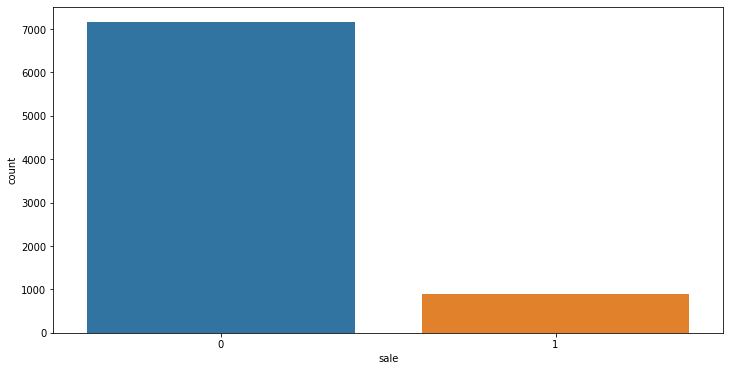

In [11]:
sns.countplot(df['sale']);
print("There are {}% revenue (target) values with 1".format(100 * df["sale"].value_counts()[1]/df.shape[0]))

There are 41.937484495162494% revenue (target) values with 1


C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


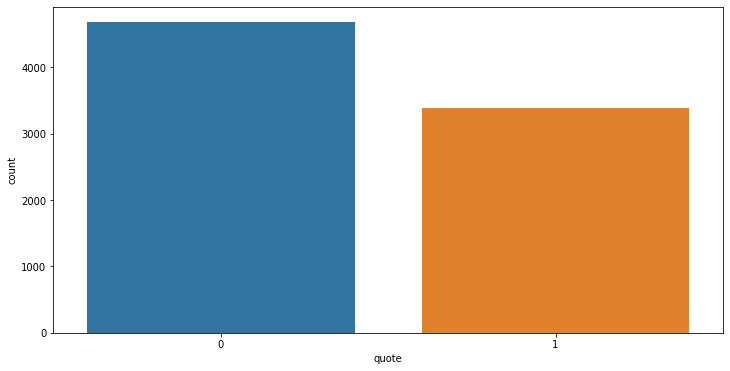

In [12]:
sns.countplot(df['quote']);
print("There are {}% revenue (target) values with 1".format(100 * df["quote"].value_counts()[1]/df.shape[0]))

C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


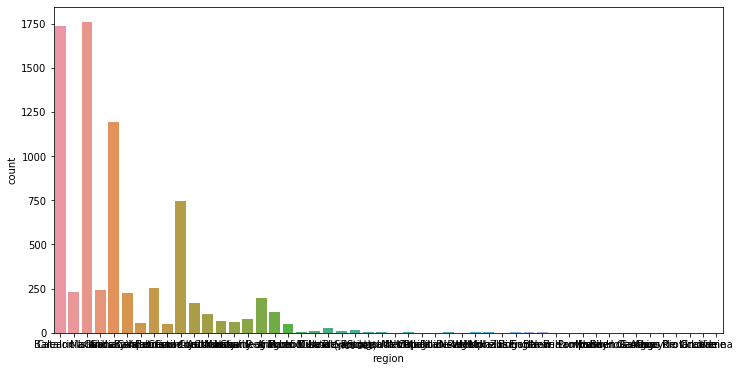

In [13]:
sns.countplot(df['region']);

In [14]:
#Clean regions out of Spain
df2["region"].replace(' ', '_', regex=True, inplace=True)
df2 = df2[~df2['region'].isin(["Ile-de-France","(not_set)","Occitanie","England","Bogota","Bavaria","North_Rhine-Westphalia","Porto_District","Santiago_Metropolitan_Region","Morelos","Melilla","Scotland","Andorra_la_Vella","Zulia","Prague","Lombardy","Hessen","New_York","Capital_District","North_Holland","Occitania","Azuay","Cartago_Province","Utrecht","New_Hampshire","Pays_de_la_Loire","Georgia","Santa_Fe_Province","Buenos_Aires","Rio_Grande","Vienna"])]

C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


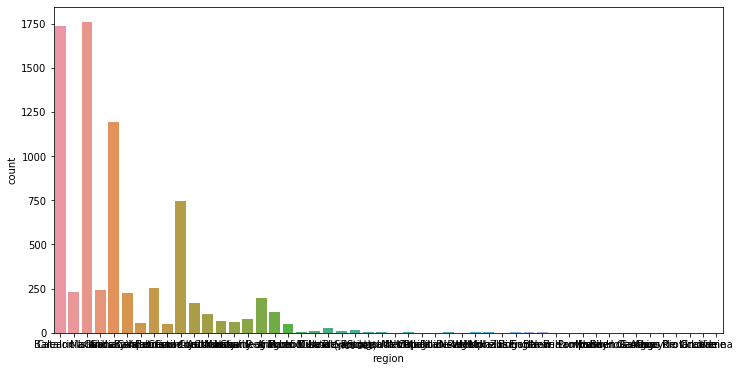

In [15]:
sns.countplot(df['region'])


C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


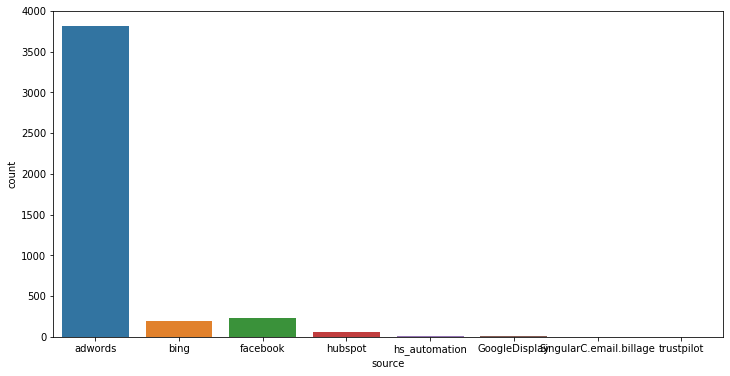

In [16]:
sns.countplot(df['source'])


C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


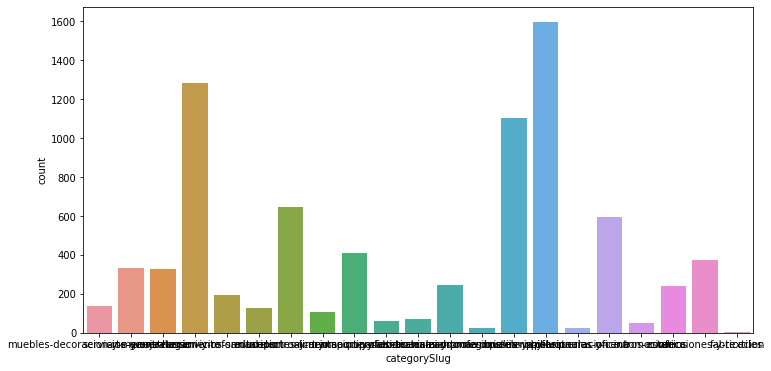

In [17]:
sns.countplot(df['categorySlug']);


C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\distributions.py:2552: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


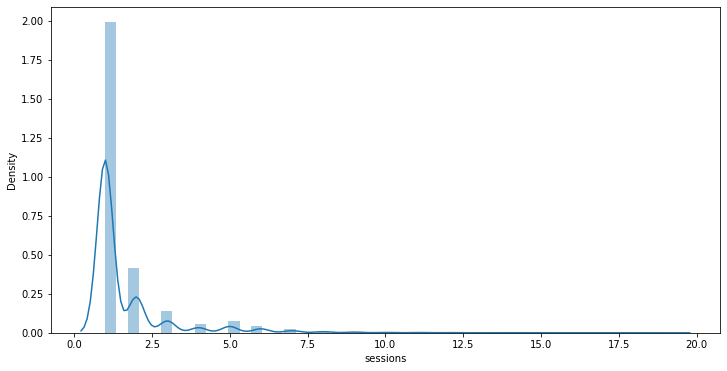

In [18]:
sns.distplot(df['sessions']);


C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


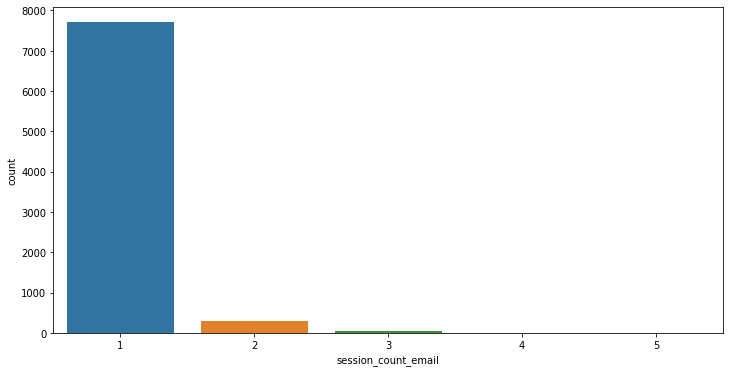

In [19]:
sns.countplot(df['session_count_email']);


C:\Users\Álvaro\anaconda3.1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


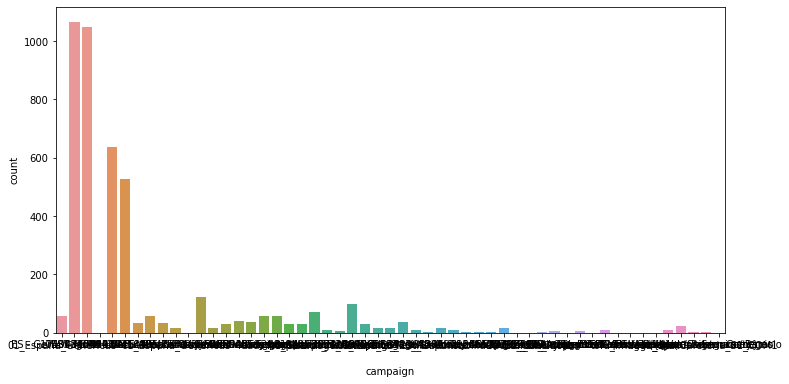

In [20]:
sns.countplot(df['campaign']);



# Check conversion rates based on various variables

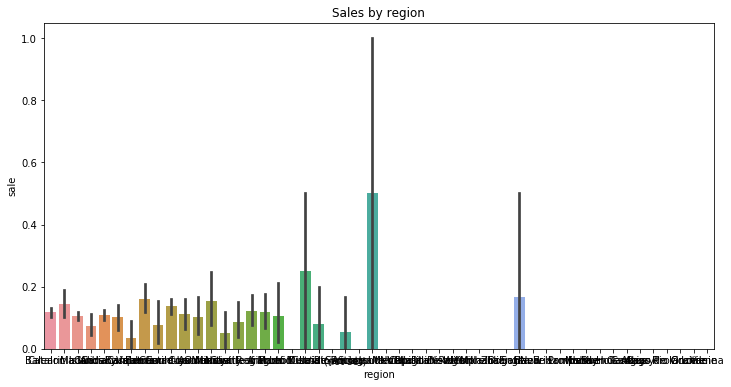

In [21]:
sns.barplot(data=df, x='region', y='sale')
_ = plt.title('Sales by region')

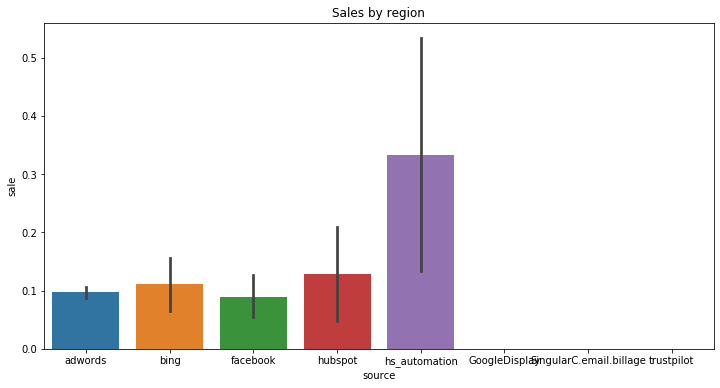

In [22]:
sns.barplot(data=df, x='source', y='sale')
_ = plt.title('Sales by region')

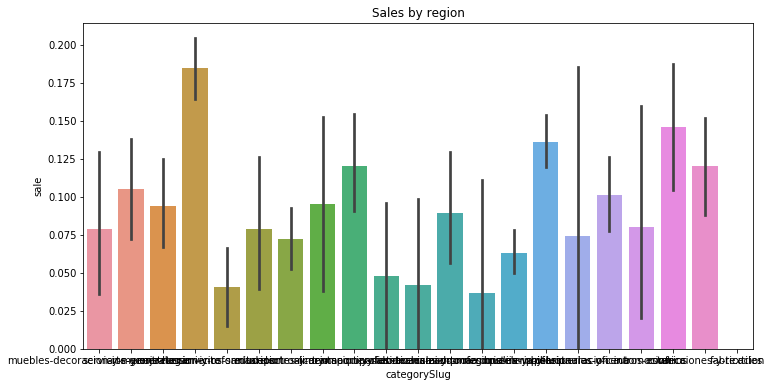

In [23]:
sns.barplot(data=df, x='categorySlug', y='sale')
_ = plt.title('Sales by region')

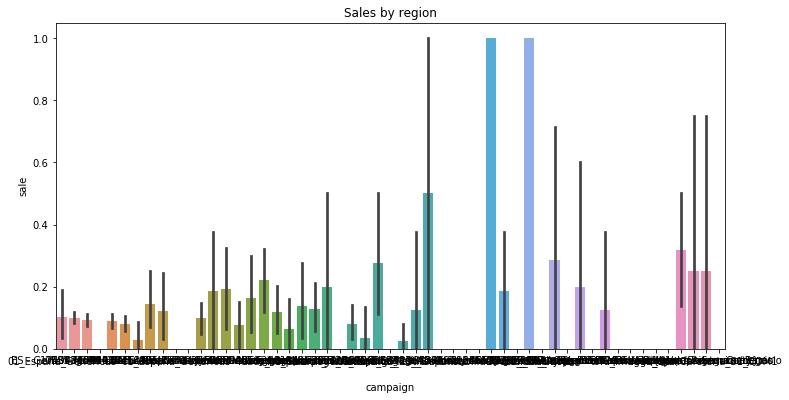

In [24]:
sns.barplot(data=df, x='campaign', y='sale')
_ = plt.title('Sales by region')

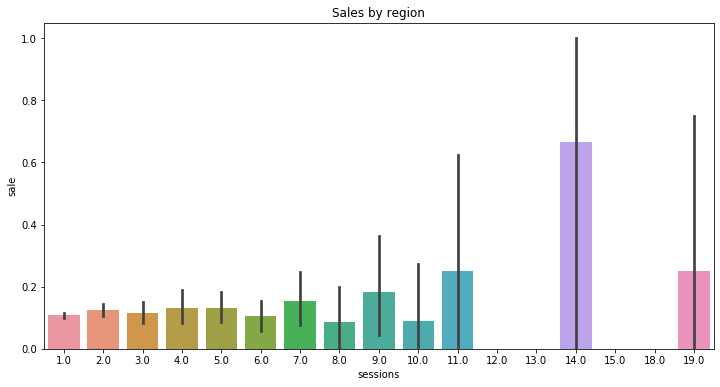

In [25]:
sns.barplot(data=df, x='sessions', y='sale')

_ = plt.title('Sales by region')

# Pair plot

# Feature engineering

In [26]:
#df['Month'] = pd.DatetimeIndex(df['Date']).month

In [27]:
def get_dummies(df, varlist):
    for var in varlist:
        df_slice = pd.get_dummies(df[var])
        df = pd.concat([df.drop(var, axis =1), df_slice], axis =1)
    return df

In [28]:
#df=df[[ "Month",'categorySlug', 'region', 'RC', 'Comercio', 'sale',"sessions", "source","quote"]]

In [29]:
def get_dummies(df, varlist):
    for var in varlist:
        df_slice = pd.get_dummies(df[var])
        df = pd.concat([df.drop(var, axis =1), df_slice], axis =1)
    return df

In [30]:
categorical_list = ["categorySlug", "region","source","campaign"]

In [31]:
df=get_dummies(df, categorical_list)
df

,eventTime_ay,Date,email,firstName,lastName,Sub_Categoria,medium,userId,singular_duplicate,test_duplicate,...,V! - ToFu - Always on,V! - ToFu - Leads Comercio - Abril 2020,V! - ToFu - Leads Comercio - Always on,V! - ToFu - Test AB Audiencas - Agosto20,declarando50,leads_comercio,logo_click,postLink,tofu_imagen_ep,{{campaign.name}}
0,2020-05-09 10:19:12,2020-05-09,eduardoperez@seincomobiliario.com,EDUARDO,PEREZ,disenador-de-muebles,NaN,083e8b2f-af6a-46b4-a9b9-4f79c1a32cf1,False,False,...,0,0,0,0,0,0,0,0,0,0
1,2020-04-12 14:50:10,2020-04-12,alexvonder@hotmail.com,Alexandra,Perez,chofer,ppc,0feedfe0-5452-434c-8a70-845fa3fd638a,False,False,...,0,0,0,0,0,0,0,0,0,0
2,2020-11-08 18:09:23,2020-11-08,Evo@gmail.com,Juanjo,Akze,fotoperiodista,cpc,18bb05eb-d592-4459-a682-f622afb7208c,False,False,...,0,0,0,0,0,0,0,0,0,0
3,2020-08-25 15:18:38,2020-08-25,cesardelacalle@grupoccs.es,cesar fernando,de la calle verde,conserje,cpc,328d85a1-28b3-493d-ad17-ab58e4567357,False,False,...,0,0,0,0,0,0,0,0,0,0
4,2020-11-16 11:02:42,2020-11-16,brsbrs02@gmail.com,Bruno,RS,proyectista,cpc,39d91a35-e406-462d-a7a5-7b2291ba8340,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,2020-07-05 11:44:34,2020-07-05,kk@hotmail.com,Santi,Mirlo,entrenador-o-monitor-deportivo,NaN,7a6ca821-1e99-4156-bb35-9d904828b26b,False,False,...,0,0,0,0,0,0,0,0,0,0
8058,2020-08-29 08:45:46,2020-08-29,sarah@slyne.com,Sarah,Slyne,entrenador-o-monitor-deportivo,NaN,ab772667-56c1-4e2a-b938-ae6e4e3980e3,False,False,...,0,0,0,0,0,0,0,0,0,0
8059,2020-06-04 09:03:30,2020-06-04,saraculebras@gmail.com,Sara,Culebras Yagüe,entrenador-o-monitor-deportivo,NaN,dc059f05-6e2a-4cb6-9436-826b38d87ce9,False,False,...,0,0,0,0,0,0,0,0,0,0
8060,2020-09-30 16:03:25,2020-09-30,blancopris@gmail.com,Priscila,Abbona,entrenador-o-monitor-deportivo,email,e2af6a50-4e9e-42c0-a5fc-784141160d31,False,False,...,0,0,0,0,0,0,0,0,0,0


In [79]:

df2['inauguration_year'] = df['inauguration_year'].fillna(0)
df2['furnitureWithEquipment'] = df['furnitureWithEquipment'].fillna(0)
df2['merchandise'] = df['merchandise'].fillna(0)
df2['surface'] = df['surface'].fillna(0)
df2['gross_income'] = df['gross_income'].fillna(0)

df['inauguration_year'] = df['inauguration_year'].fillna(0)
df['furnitureWithEquipment'] = df['furnitureWithEquipment'].fillna(0)
df['merchandise'] = df['merchandise'].fillna(0)
df['surface'] = df['surface'].fillna(0)
df['gross_income'] = df['gross_income'].fillna(0)

df3['inauguration_year'] = df['inauguration_year'].fillna(0)
df3['furnitureWithEquipment'] = df['furnitureWithEquipment'].fillna(0)
df3['merchandise'] = df['merchandise'].fillna(0)
df3['surface'] = df['surface'].fillna(0)
df3['gross_income'] = df['gross_income'].fillna(0)


In [33]:
df['sale'].value_counts()

0    7157
1     905
Name: sale, dtype: int64

In [34]:
df=df.dropna()

In [35]:
df.to_csv('../data/df_after_EDA.csv', index=False)

In [36]:
#Cleaning NaNs

In [37]:
df2.isnull().sum()

eventTime_ay      0
Date              0
email             0
firstName         0
lastName          0
               ... 
city            599
cityId          599
region          599
regionId        599
sessions        599
Length: 106, dtype: int64

In [38]:
df["time_diff_fd_pm"].count

<bound method Series.count of Series([], Name: time_diff_fd_pm, dtype: object)>

# Second database

DF for Business insurance leads

In [39]:
df=df2[['categorySlug', 'region', 'Comercio', 'sale',"sessions", "source","quote","inauguration_year","furnitureWithEquipment","merchandise","surface","gross_income"]]

In [40]:
def get_dummies(df, varlist):
    for var in varlist:
        df_slice = pd.get_dummies(df[var])
        df = pd.concat([df.drop(var, axis =1), df_slice], axis =1)
    return df

In [41]:
categorical_list = ["categorySlug", "region","source"]

In [42]:
df=get_dummies(df, categorical_list)

In [43]:
df

,Comercio,sale,sessions,quote,inauguration_year,furnitureWithEquipment,merchandise,surface,gross_income,alimentacion-y-dietetica,...,Region_of_Murcia,Valencian_Community,GoogleDisplay,SingularC.email.billage,adwords,bing,facebook,hs_automation,hubspot,trustpilot
0,0.0,0,2.0,1,0.0,0.0,0.0,0.0,30000.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,6.0,1,0.0,0.0,0.0,0.0,30000.0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,0,2.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,0.0,0,1.0,1,0.0,0.0,0.0,0.0,30000.0,0,...,0,1,0,0,0,0,0,0,0,0
8058,0.0,0,2.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8059,0.0,0,1.0,1,0.0,0.0,0.0,0.0,30000.0,0,...,0,0,0,0,0,0,0,0,0,0
8060,0.0,0,1.0,1,0.0,0.0,0.0,0.0,30000.0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
df['sale'].value_counts()

0    7075
1     902
Name: sale, dtype: int64

In [48]:
df=df.dropna()

In [49]:
df.to_csv('../data/df_CM_.csv', index=False)

df

In [82]:
df3=df[['categorySlug', 'region', "RC", 'sale',"sessions", "source","campaign","session_count_email","quote"]]

In [83]:
def get_dummies(df3, varlist):
    for var in varlist:
        df_slice = pd.get_dummies(df3[var])
        df3 = pd.concat([df3.drop(var, axis =1), df_slice], axis =1)
    return df3

In [84]:
categorical_list = ["categorySlug", "region","source","campaign"]

In [85]:
df3=get_dummies(df3, categorical_list)

In [86]:
df3=df3.dropna()

In [87]:
df3['sale'].value_counts()

0    6537
1     836
Name: sale, dtype: int64

In [88]:
df3.to_csv('../data/df_RC_.csv', index=False)
df3

,RC,sale,sessions,session_count_email,quote,alimentacion-y-dietetica,arte-y-entretenimiento,automocion,calzado-marroqueria-y-piel,confecciones-y-textiles,...,V! - ToFu - Always on,V! - ToFu - Leads Comercio - Abril 2020,V! - ToFu - Leads Comercio - Always on,V! - ToFu - Test AB Audiencas - Agosto20,declarando50,leads_comercio,logo_click,postLink,tofu_imagen_ep,{{campaign.name}}
0,1.0,0,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,6.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,1.0,0,1.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8058,1.0,0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8059,1.0,0,1.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8060,1.0,0,1.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Comercio & RC

In [ ]:
df4=df2[["quote",'categorySlug', 'region',"Comercio", "RC", 'sale',"sessions", "source","campaign","session_count_email","inauguration_year","furnitureWithEquipment","merchandise","surface","gross_income"]

In [ ]:
df4['sale'].value_counts()

In [ ]:
categorical_list = ["categorySlug", "region","source","campaign"]

In [ ]:
df4.isnull().sum()

In [ ]:
df4

Automatically created module for IPython interactive environment


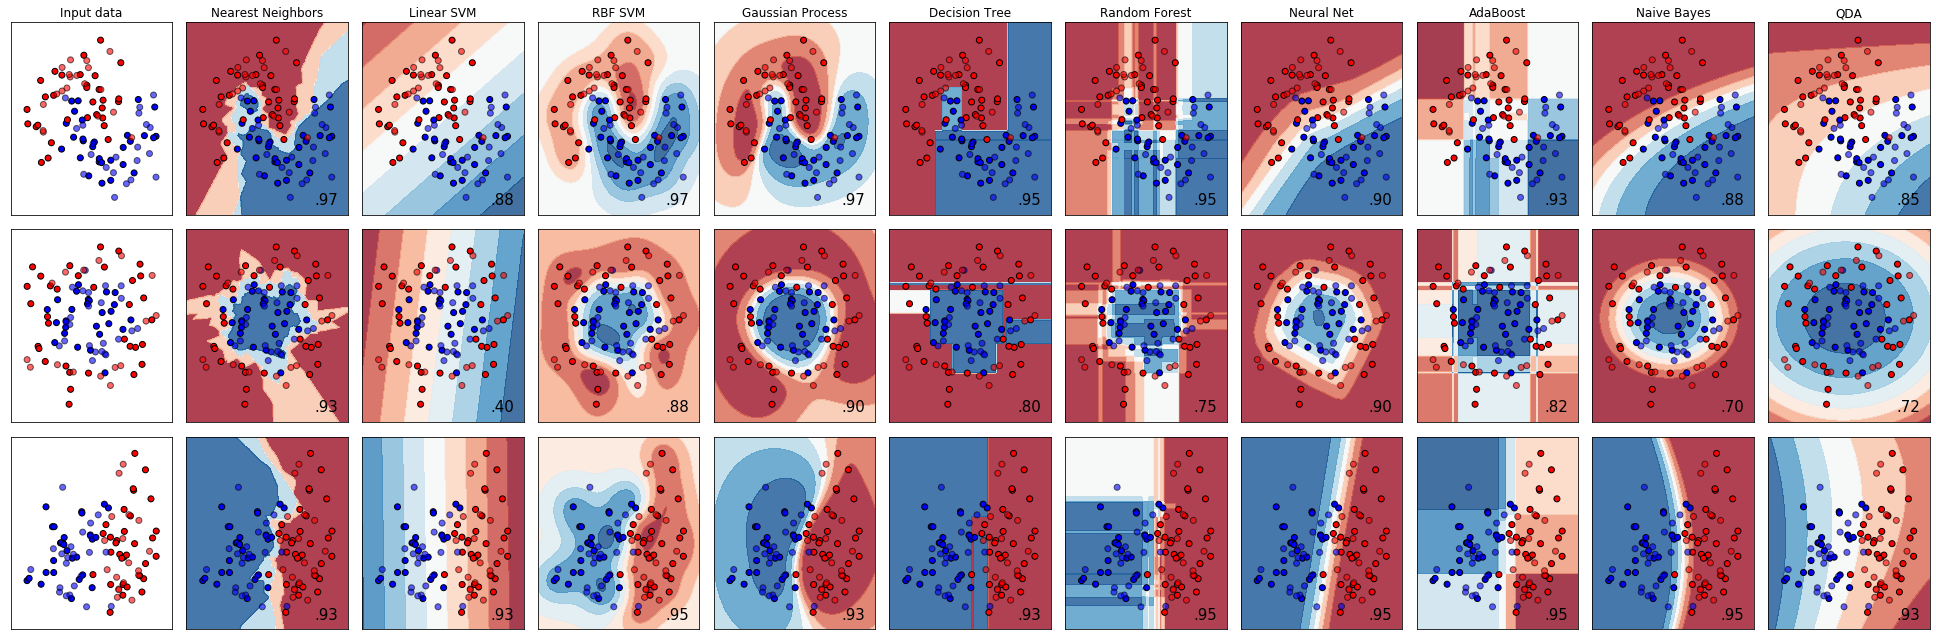

In [23]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()